In [2]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
### Load datasets
proc_all_data = [
    pd.read_csv('ProcAll/Machine1_ReceivedStream1.csv'),
    pd.read_csv('ProcAll/Machine1_ReceivedStream2.csv'),
    pd.read_csv('ProcAll/Machine2_ReceivedStream1.csv'),
    pd.read_csv('ProcAll/Machine2_ReceivedStream2.csv'),
]
proc_all_data = [df.rename(columns={df.columns[0]: "LSL", df.columns[1]: "Harp"}).reindex(columns = ["Harp", "LSL"]) for df in proc_all_data]

proc_clksync_data = [
    pd.read_csv('ProcClksync/Machine1_ReceivedStream1.csv'),
    pd.read_csv('ProcClksync/Machine1_ReceivedStream2.csv'),
    pd.read_csv('ProcClksync/Machine2_ReceivedStream1.csv'),
    pd.read_csv('ProcClksync/Machine2_ReceivedStream2.csv'),
]
proc_clksync_data = [df.rename(columns={df.columns[0]: "LSL", df.columns[1]: "Harp"}).reindex(columns = ["Harp", "LSL"]) for df in proc_clksync_data]

proc_none_data = [
    pd.read_csv('ProcNone/Machine1_ReceivedStream1.csv'),
    pd.read_csv('ProcNone/Machine1_ReceivedStream2.csv'),
    pd.read_csv('ProcNone/Machine2_ReceivedStream1.csv'),
    pd.read_csv('ProcNone/Machine2_ReceivedStream2.csv'),
]
proc_none_data = [df.rename(columns={df.columns[0]: "LSL", df.columns[1]: "Harp"}).reindex(columns = ["Harp", "LSL"]) for df in proc_none_data]

print(proc_none_data[0])

             Harp           LSL
0     6463.093504  1.212798e+06
1     6463.851488  1.212799e+06
2     6464.040480  1.212799e+06
3     6464.319488  1.212799e+06
4     6464.704480  1.212800e+06
...           ...           ...
1172  7077.475488  1.213413e+06
1173  7077.832480  1.213413e+06
1174  7078.115488  1.213413e+06
1175  7078.721504  1.213414e+06
1176  7078.947488  1.213414e+06

[1177 rows x 2 columns]


In [166]:
### Align by harp timestamps
def align_by_harp(data_array):
    aligned1 = pd.merge_asof(data_array[0], data_array[1], on='Harp', direction='nearest', tolerance=0.0001)
    aligned1.rename(columns={aligned1.columns[0]: "Harp", aligned1.columns[1]: "LSL1", aligned1.columns[2]: "LSL2"}, inplace=True)

    aligned2 = pd.merge_asof(data_array[2], data_array[3], on='Harp', direction='nearest', tolerance=0.0001)
    aligned2.rename(columns={aligned2.columns[0]: "Harp", aligned2.columns[1]: "LSL3", aligned2.columns[2]: "LSL4"}, inplace=True)

    aligned = pd.merge_asof(aligned1, aligned2, on='Harp', direction='nearest', tolerance=0.0001)

    return aligned

proc_all_aligned = align_by_harp(proc_all_data)
proc_clksync_aligned = align_by_harp(proc_clksync_data)
proc_none_aligned = align_by_harp(proc_none_data)

print(proc_none_aligned)

             Harp          LSL1          LSL2          LSL3          LSL4
0     6463.093504  1.212798e+06  1.361027e+06  1.212798e+06  1.361027e+06
1     6463.851488  1.212799e+06  1.361028e+06  1.212799e+06  1.361028e+06
2     6464.040480  1.212799e+06  1.361028e+06  1.212799e+06  1.361028e+06
3     6464.319488  1.212799e+06  1.361028e+06  1.212799e+06  1.361028e+06
4     6464.704480  1.212800e+06  1.361029e+06  1.212800e+06  1.361029e+06
...           ...           ...           ...           ...           ...
1172  7077.475488  1.213413e+06  1.361641e+06  1.213413e+06  1.361641e+06
1173  7077.832480  1.213413e+06  1.361642e+06  1.213413e+06  1.361642e+06
1174  7078.115488  1.213413e+06  1.361642e+06  1.213413e+06  1.361642e+06
1175  7078.721504  1.213414e+06  1.361643e+06  1.213414e+06  1.361643e+06
1176  7078.947488  1.213414e+06  1.361643e+06  1.213414e+06  1.361643e+06

[1177 rows x 5 columns]


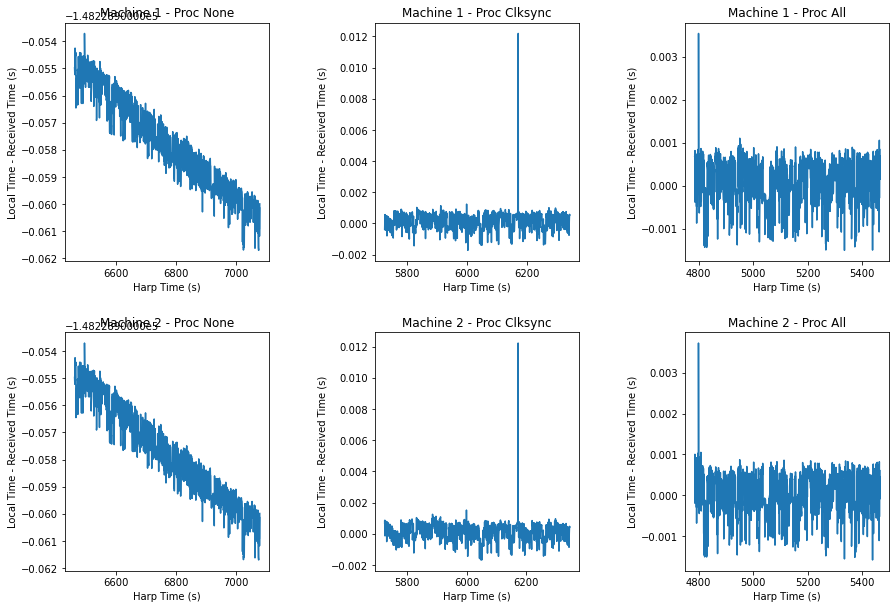

In [189]:
### Preview data
fig, axes = plt.subplots(2, 3)
fig.tight_layout()

plt.subplot(2, 3, 1)
plt.plot(proc_none_aligned["Harp"], proc_none_aligned["LSL1"] - proc_none_aligned["LSL2"])
plt.title("Machine 1 - Proc None")
plt.xlabel("Harp Time (s)")
plt.ylabel("Local Time - Received Time (s)")

plt.subplot(2, 3, 4)
plt.plot(proc_none_aligned["Harp"], proc_none_aligned["LSL3"] - proc_none_aligned["LSL4"])
plt.title("Machine 2 - Proc None")
plt.xlabel("Harp Time (s)")
plt.ylabel("Local Time - Received Time (s)")

plt.subplot(2, 3, 2)
plt.plot(proc_clksync_aligned["Harp"], proc_clksync_aligned["LSL1"] - proc_clksync_aligned["LSL2"])
plt.title("Machine 1 - Proc Clksync")
plt.xlabel("Harp Time (s)")
plt.ylabel("Local Time - Received Time (s)")

plt.subplot(2, 3, 5)
plt.plot(proc_clksync_aligned["Harp"], proc_clksync_aligned["LSL3"] - proc_clksync_aligned["LSL4"])
plt.title("Machine 2 - Proc Clksync")
plt.xlabel("Harp Time (s)")
plt.ylabel("Local Time - Received Time (s)")

plt.subplot(2, 3, 3)
plt.plot(proc_all_aligned["Harp"], proc_all_aligned["LSL1"] - proc_all_aligned["LSL2"])
plt.title("Machine 1 - Proc All")
plt.xlabel("Harp Time (s)")
plt.ylabel("Local Time - Received Time (s)")

plt.subplot(2, 3, 6)
plt.plot(proc_all_aligned["Harp"], proc_all_aligned["LSL3"] - proc_all_aligned["LSL4"])
plt.title("Machine 2 - Proc All")
plt.xlabel("Harp Time (s)")
plt.ylabel("Local Time - Received Time (s)")

plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

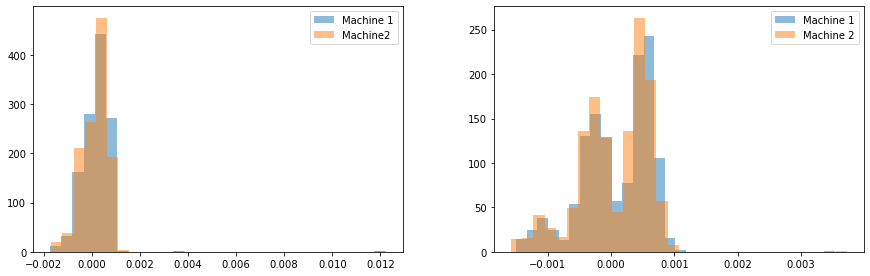

In [208]:
### Distributions
fig, axes = plt.subplots(1, 2)
fig.tight_layout()

plt.subplot(1, 2, 1)
plt.hist(proc_clksync_aligned["LSL1"] - proc_clksync_aligned["LSL2"], bins=30, alpha=0.5, label="Machine 1")
plt.hist(proc_clksync_aligned["LSL3"] - proc_clksync_aligned["LSL4"], bins=30, alpha=0.5, label="Machine2")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.hist(proc_all_aligned["LSL1"] - proc_all_aligned["LSL2"], bins=30, alpha=0.5, label="Machine 1")
plt.hist(proc_all_aligned["LSL3"] - proc_all_aligned["LSL4"], bins=30, alpha=0.5, label="Machine 2")
plt.legend(loc='upper right')

plt.subplots_adjust(right=2)